# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
import keras
from keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7678 - loss: 0.7574 - val_accuracy: 0.9782 - val_loss: 0.0793
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9644 - loss: 0.1190 - val_accuracy: 0.9848 - val_loss: 0.0539
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9739 - loss: 0.0842 - val_accuracy: 0.9867 - val_loss: 0.0455
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9780 - loss: 0.0700 - val_accuracy: 0.9878 - val_loss: 0.0429
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.0635 - val_accuracy: 0.9907 - val_loss: 0.0380
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0498 - val_accuracy: 0.9892 - val_loss: 0.0368
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9905 - val_loss: 0.0324
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 

In [7]:
# dir(model)

## Evaluate the trained model

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023512642830610275
Test accuracy: 0.9921000003814697


In [172]:
from PIL import Image
import tensorflow as tf

In [184]:
img = keras.utils.load_img(
    './digits.png',
    color_mode="rgba",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False
)

img = img.convert('L')  # Convert to grayscale
img = keras.utils.img_to_array(img, data_format=None, dtype=None)
img = tf.where(img < 128, 1.0, 0.0)

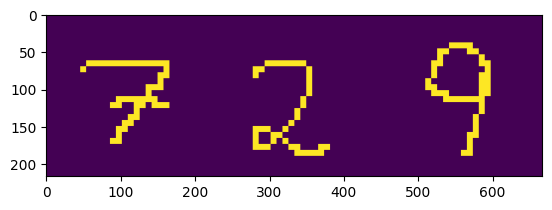

In [185]:
plt.imshow(img)

In [186]:
height, width, depth = img.shape

In [237]:
digit1 = tf.image.resize(img[:, :222], (28, 28)).numpy()
digit2 = tf.image.resize(img[:, 222:444], (28, 28)).numpy()
digit3 = tf.image.resize(img[:, 444:], (28, 28)).numpy()

In [227]:
# model.predict(digit1)
digit1.shape, digit2.shape, digit3.shape

((28, 28, 1), (28, 28, 1), (28, 28, 1))

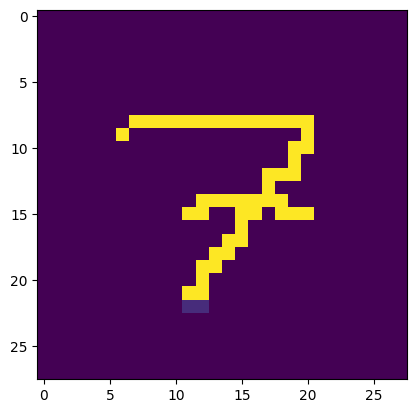

In [228]:
from matplotlib import pyplot as plt
plt.imshow(digit1)

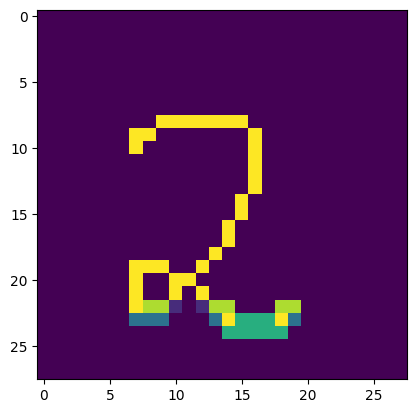

In [229]:
plt.imshow(digit2)

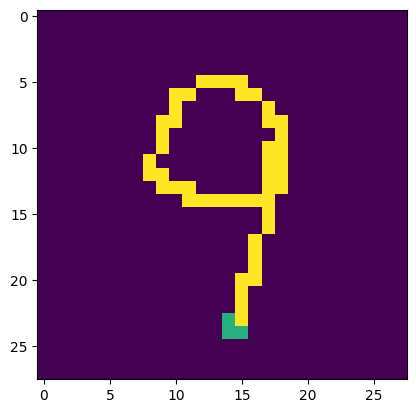

In [230]:
plt.imshow(digit3)

In [235]:
p1 = model.predict(np.expand_dims(digit1, axis=0))
p2 = model.predict(np.expand_dims(digit2, axis=0))
p3 = model.predict(np.expand_dims(digit3, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [236]:
np.argmax(p1), np.argmax(p2), np.argmax(p3)

(np.int64(7), np.int64(2), np.int64(9))